In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1
df = pd.read_csv('medical_examination.csv')

In [3]:
# 2
bmi = (df['weight'])/((df['height']/100)**2)
#df['bmi'] = bmi;
df['overweight'] = np.where(bmi >= 25, 1, 0)

# 3
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)

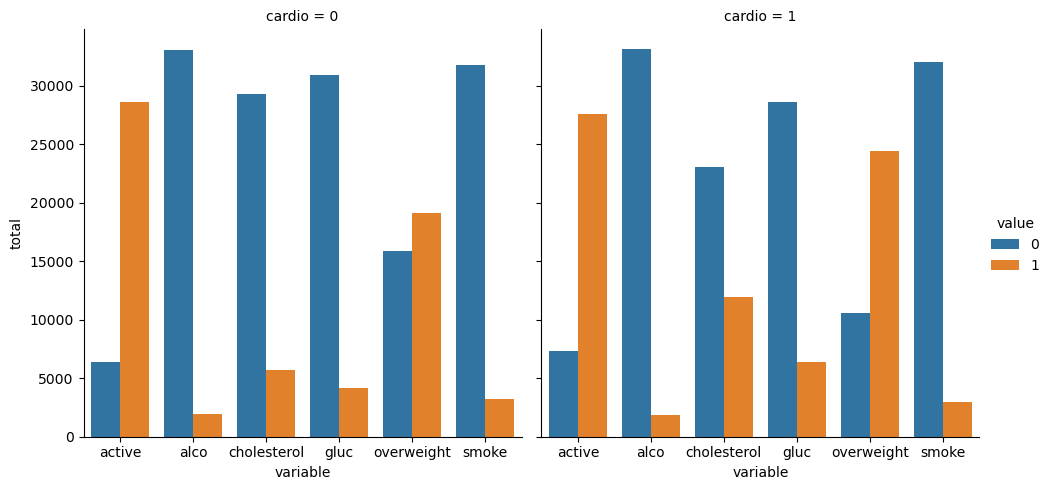

In [7]:
# 4
def draw_cat_plot():
    # 5
    fig = sns.catplot(x='variable',hue='value',data=df_cat,kind='count',col='cardio')
    fig.set_ylabels('total')
    # fig = fig.fig


    # 9
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

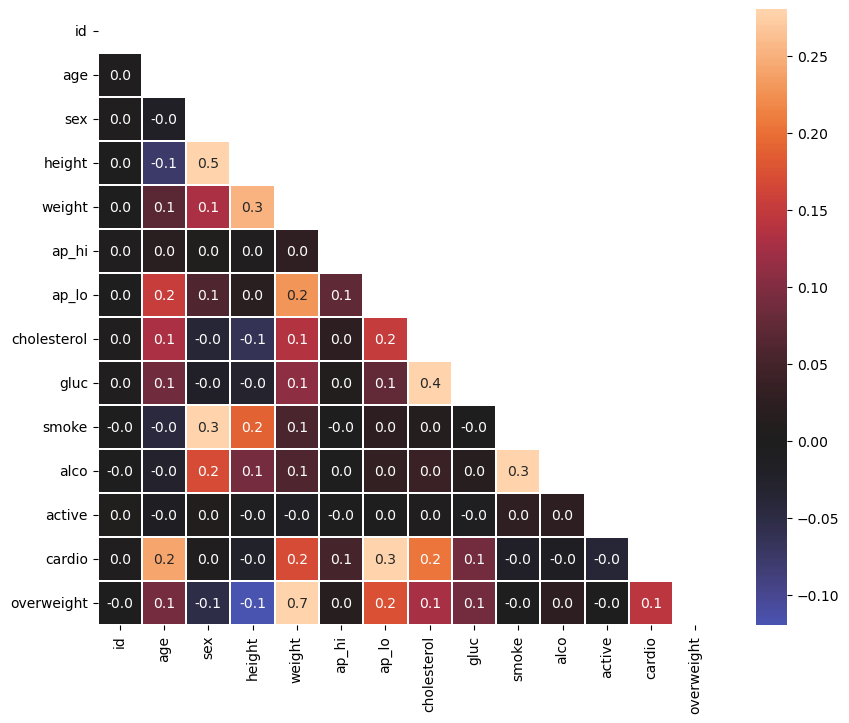

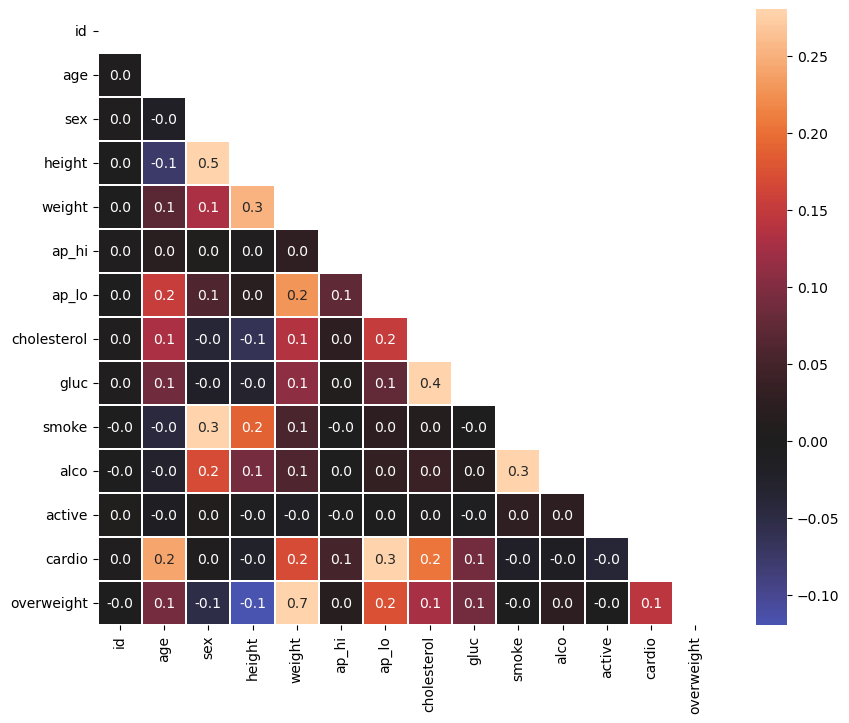

In [8]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
    corr = df_heat.corr()
    mask = np.triu(corr)
      
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(data=corr, mask=mask, annot=True, center=0, vmin=-0.12, vmax=0.28, fmt='0.1f', linewidths=0.2)


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()